# Import Necessary Packages

Also divided train-1000-100 into three training datasets

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [2]:
#df1 = pd.read_csv('train-1000-100.csv')

#df1 = df1.iloc[:50,:]
#df2 = df1.iloc[:100,:]
#df3 = df1.iloc[:150,:]

#df1.to_csv('train-50(1000)-100.csv')
#df2.to_csv('train-100(1000)-100.csv')
#df3.to_csv('train-150(1000)-100.csv')

# Import Data

### Training Data Sets

Import first dataset (test-100-10.csv) as pandas dataframe

In [3]:
train_df1 = pd.read_csv('train-100-10.csv').iloc[:,:11]
train_df2 = pd.read_csv('train-100-100.csv')
train_df3 = pd.read_csv('train-1000-100.csv')
train_df4 = pd.read_csv('train-50(1000)-100.csv', index_col = 0)
train_df5 = pd.read_csv('train-100(1000)-100.csv', index_col = 0)
train_df6 = pd.read_csv('train-150(1000)-100.csv', index_col = 0)

### Testing Data Sets

In [4]:
test_df1 = pd.read_csv('test-100-10.csv')
test_df2 = pd.read_csv('test-100-100.csv')
test_df3456 = pd.read_csv('test-1000-100.csv')

# Functions

### Separate into features and target

In [5]:
def feature_target(df, col):
    
    df_f = df.iloc[:,:col] # feature
    df_t = df.iloc[:,col] # target
    
    return df_f, df_t

In [6]:
f,t = feature_target(train_df1, 10)


### MSE function

In [7]:
def mse_func(w, feature_col, target_col):
    
    """Returns Mean Squared Error"""
    
    w = w.T
    l = list()
    
    for i in range(len(target_col)):
        y_pred = np.sum(np.array(w) * np.array(feature_col.iloc[i,:]))
        y = np.array(target_col.iloc[i])                
        score = (y - y_pred)**2
        l.append(score)
        
    mse = np.sum(l)/len(target_col)
    return mse

### Ridge MSE list for training data (lambda included)

In [8]:
# Ridge for train
def train_mse(feature_col, target_col, dim):
    """Returns list of 150 mse scores for 150 lambda levels ranging from 1 to 150 
    Takes in X and y matrices, as well as feature (f), and target (t) columns"""
    
    X = np.matrix(feature_col.as_matrix()) # X
    y = np.matrix(target_col.as_matrix()) # y
    
    lamb_list = list()

    for lamb in range(0, 151):

        X_squared_L2 = (X.T * X) + (lamb * np.identity(dim))

        X_dagger_L2 = X_squared_L2.I * X.T

        w_L2 = X_dagger_L2 * y.T

        lamb_list.append(w_L2)
        
    mse_list = list()

    for i in lamb_list:
        mse_score = mse_func(i, feature_col, target_col)
        mse_list.append(mse_score)

    return mse_list


### Ridge lambda list for test data -- could maybe condense into one function with 5 inputs

In [9]:
def test_list(train_feature_col, train_target_col, dim):
    """Returns list of 150 mse scores for 150 lambda levels ranging from 1 to 150 
    Takes in X and y matrices, as well as feature (f), and target (t) columns"""
    
    X = np.matrix(train_feature_col.as_matrix()) # X
    y = np.matrix(train_target_col.as_matrix()) # y
    
    lamb_list = list()

    for lamb in range(0, 151):

        X_squared_L2 = (X.T * X) + (lamb * np.identity(dim))

        X_dagger_L2 = X_squared_L2.I * X.T

        w_L2 = X_dagger_L2 * y.T

        lamb_list.append(w_L2)

    return lamb_list


### Ridge MSE list for test data

In [10]:
def test_mses(lamb, test_feature_col, test_target_col):
    """takes training lamb list and test feature and target"""
    
    mse_list = list()
    
    for i in lamb:
        mse_score = mse_func(i, test_feature_col, test_target_col)
        mse_list.append(mse_score)
        
    return mse_list

# 1st DataSet (100-10)

train-100-10.csv
test-100-10.csv

### Data Set 1 Training Data

In [11]:
train_df1_f, train_df1_t = feature_target(train_df1, 10) # separate df1 into features and columns

In [12]:
train_df1_mse_list = train_mse(train_df1_f, train_df1_t, 10) # generate training data mse scores for lambda range

In [13]:
print('Optimal lambda train_df1 = {},'.format(np.argmin(train_df1_mse_list)), 'MSE = {};'.format(np.min(train_df1_mse_list)), 
      
      'Worst lambda train_df1 = {},'.format(np.argmax(train_df1_mse_list)), 'MSE = {}'.format(np.max(train_df1_mse_list)))

Optimal lambda train_df1 = 0, MSE = 3.569429987197442; Worst lambda train_df1 = 150, MSE = 5.020475922027094


### Data Set 1 Test Data

In [14]:
test_df1 = pd.read_csv('test-100-10.csv')

test_df1_f, test_df1_t = feature_target(test_df1, 10)

In [15]:
train_w_list = test_list(train_df1_f, train_df1_t, 10)

test_df1_mse_list = test_mses(train_w_list, test_df1_f, test_df1_t,)

In [16]:
print('Optimal lambda test_df1 = {},'.format(np.argmin(test_df1_mse_list)), 'MSE = {};'.format(np.min(test_df1_mse_list)), 
      
      'Worst lambda test_df1 = {},'.format(np.argmax(test_df1_mse_list)), 'MSE = {}'.format(np.max(test_df1_mse_list)))

Optimal lambda test_df1 = 8, MSE = 4.159678509482879; Worst lambda test_df1 = 150, MSE = 5.92969408967808


### Visualize Data Set 1 

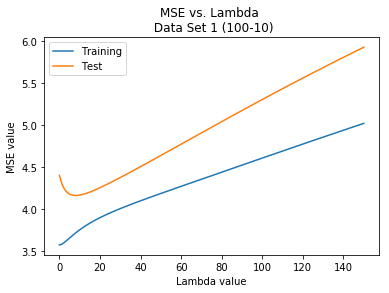

In [161]:
plt.figure()
plt.plot(train_df1_mse_list)
plt.plot(test_df1_mse_list) 
plt.ylabel('MSE value')
plt.xlabel('Lambda value')
plt.title('MSE vs. Lambda \n Data Set 1 (100-10)')
plt.legend(['Training', 'Test'])

#plt.savefig("Q1_plot_1.pdf")

plt.show()

# 2nd DataSet (100-100)

train and test 100-100

### Data Set 2 Train Data

In [18]:
train_df2_f, train_df2_t = feature_target(train_df2, 100) # separate df2 into features and columns

In [19]:
train_df2_mse_list = train_mse(train_df2_f, train_df2_t, 100) # generate training data mse scores for lambda range

In [20]:
print('Optimal lambda train_df2 = {},'.format(np.argmin(train_df2_mse_list)), 'MSE = {};'.format(np.min(train_df2_mse_list)), 
      
      'Worst lambda train_df2 = {},'.format(np.argmax(train_df2_mse_list)), 'MSE = {}'.format(np.max(train_df2_mse_list)))

Optimal lambda train_df2 = 0, MSE = 1.0463400588531212e-20; Worst lambda train_df2 = 150, MSE = 5.596313555031677


### Data Set 2 Test Data

In [21]:
test_df2 = pd.read_csv('test-100-100.csv')

test_df2_f, test_df2_t = feature_target(test_df2, 100)

In [22]:
train_w_list = test_list(train_df2_f, train_df2_t, 100)

test_df2_mse_list = test_mses(train_w_list, test_df2_f, test_df2_t)

In [23]:
print('Optimal lambda test_df2 = {},'.format(np.argmin(test_df2_mse_list)), 'MSE = {};'.format(np.min(test_df2_mse_list)), 
      
      'Worst lambda test_df2 = {},'.format(np.argmax(test_df2_mse_list)), 'MSE = {}'.format(np.max(test_df2_mse_list)))

Optimal lambda test_df2 = 22, MSE = 5.078299800742613; Worst lambda test_df2 = 0, MSE = 259.5997814663774


### Visualize Data Set 2

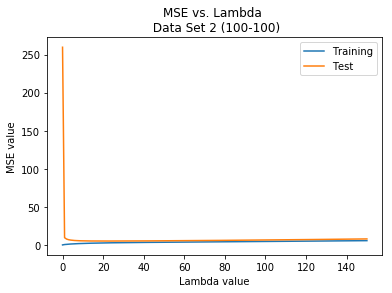

In [160]:
plt.figure()
plt.plot(train_df2_mse_list)
plt.plot(test_df2_mse_list) 
plt.ylabel('MSE value')
plt.xlabel('Lambda value')
plt.title('MSE vs. Lambda \n Data Set 2 (100-100)')
plt.legend(['Training', 'Test'])


plt.show()

### Additional Plot 1-150 1b

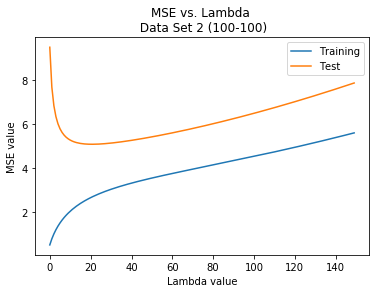

In [159]:
plt.figure()
plt.plot(train_df2_mse_list[1:])
plt.plot(test_df2_mse_list[1:]) 
plt.ylabel('MSE value')
plt.xlabel('Lambda value')
plt.title('MSE vs. Lambda \n Data Set 2 (100-100)')
plt.legend(['Training', 'Test'])

#plt.savefig("Q1b_plot_1.pdf")

plt.show()

# 3rd Dataset (1000-100)

train and test 1000-100

### 3rd Data Set Train

In [26]:
train_df3_f, train_df3_t = feature_target(train_df3, 100) # separate df into features and columns

In [27]:
train_df3_mse_list = train_mse(train_df3_f, train_df3_t, 100) # generate training data mse scores for lambda range

In [28]:
print('Optimal lambda train_df3 = {},'.format(np.argmin(train_df3_mse_list)), 'MSE = {};'.format(np.min(train_df3_mse_list)), 
      
      'Worst lambda train_df3 = {},'.format(np.argmax(train_df3_mse_list)), 'MSE = {}'.format(np.max(train_df3_mse_list)))

Optimal lambda train_df3 = 0, MSE = 3.4349413977066816; Worst lambda train_df3 = 150, MSE = 3.9487467755101586


### 3rd Data Set Test

In [29]:
test_df3 = pd.read_csv('test-1000-100.csv')

test_df3_f, test_df3_t = feature_target(test_df3, 100)

In [30]:
train_w_list = test_list(train_df3_f, train_df3_t, 100)

test_df3_mse_list = test_mses(train_w_list, test_df3_f, test_df3_t)

In [31]:
print('Optimal lambda test_df3 = {},'.format(np.argmin(test_df3_mse_list)), 'MSE = {};'.format(np.min(test_df3_mse_list)), 
      
      'Worst lambda test_df3 = {},'.format(np.argmax(test_df3_mse_list)), 'MSE = {}'.format(np.max(test_df3_mse_list)))

Optimal lambda test_df3 = 27, MSE = 4.315570630282882; Worst lambda test_df3 = 150, MSE = 4.5056244441483395


### Visualize Data Set 3 

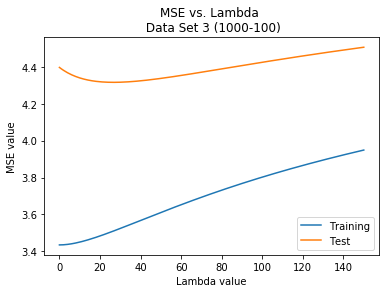

In [158]:
plt.figure()
plt.plot(train_df3_mse_list)
plt.plot(test_df3_mse_list)  
plt.ylabel('MSE value')
plt.xlabel('Lambda value')
plt.title('MSE vs. Lambda \n Data Set 3 (1000-100)')
plt.legend(['Training', 'Test'])

#plt.savefig("Q1_plot_3.pdf")

plt.show()

# 4th Data Set Test (50(1000)-100)

train 50(1000)-100; test 1000-100

### 4th Data Set Training 

In [33]:
train_df4_f, train_df4_t = feature_target(train_df4, 100) # separate df into features and columns

In [34]:
train_df4_mse_list = train_mse(train_df4_f, train_df4_t, 100) # generate training data mse scores for lambda range

In [35]:
print('Optimal lambda train_df4 = {},'.format(np.argmin(train_df4_mse_list)), 'MSE = {};'.format(np.min(train_df4_mse_list)), 
      
      'Worst lambda train_df4 = {},'.format(np.argmax(train_df4_mse_list)), 'MSE = {}'.format(np.max(train_df4_mse_list)))

Optimal lambda train_df4 = 1, MSE = 0.3847245139232377; Worst lambda train_df4 = 0, MSE = 13302.209226419604


### 4th Data Set Test

In [36]:
test_df4 = pd.read_csv('test-1000-100.csv')

test_df4_f, test_df4_t = feature_target(test_df4, 100)

In [37]:
train_w_list = test_list(train_df4_f, train_df4_t, 100)

test_df4_mse_list = test_mses(train_w_list, test_df4_f, test_df4_t)

In [38]:
print('Optimal lambda test_df4 = {},'.format(np.argmin(test_df4_mse_list)), 'MSE = {};'.format(np.min(test_df4_mse_list)), 
      
      'Worst lambda test_df4 = {},'.format(np.argmax(test_df4_mse_list)), 'MSE = {}'.format(np.max(test_df4_mse_list)))

Optimal lambda test_df4 = 8, MSE = 5.540902229344904; Worst lambda test_df4 = 0, MSE = 231033.69751443178


### Visualize Data Set 4 

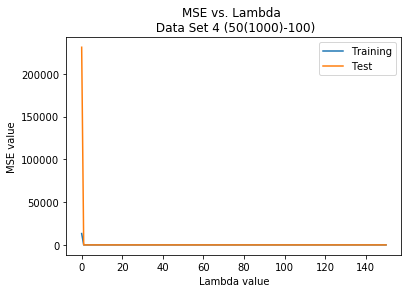

In [157]:
plt.figure()
plt.plot(train_df4_mse_list)
plt.plot(test_df4_mse_list)  
plt.ylabel('MSE value')
plt.xlabel('Lambda value')
plt.title('MSE vs. Lambda \n Data Set 4 (50(1000)-100)')
plt.legend(['Training', 'Test'])

#plt.savefig("Q1_plot_4.pdf")

plt.show()

### Additional Plot 1b

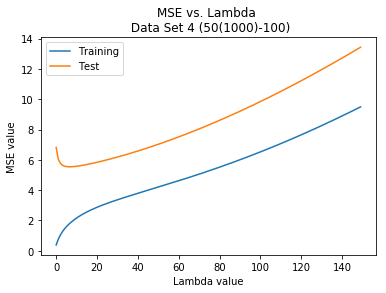

In [156]:
plt.figure()
plt.plot(train_df4_mse_list[1:])
plt.plot(test_df4_mse_list[1:])  
plt.ylabel('MSE value')
plt.xlabel('Lambda value')
plt.title('MSE vs. Lambda \n Data Set 4 (50(1000)-100)')
plt.legend(['Training', 'Test'])

#plt.savefig("Q1b_plot_2.pdf")

plt.show()

# 5th Data Set Test (100(1000)-100)

train 100(1000)-100; test 1000-100

### 5th Data Set Training 

In [41]:
train_df5_f, train_df5_t = feature_target(train_df5, 100) # separate df into features and columns

In [42]:
train_df5_mse_list = train_mse(train_df5_f, train_df5_t, 100) # generate training data mse scores for lambda range

In [43]:
print('Optimal lambda train_df5 = {},'.format(np.argmin(train_df5_mse_list)), 'MSE = {};'.format(np.min(train_df5_mse_list)), 
      
      'Worst lambda train_df5 = {},'.format(np.argmax(train_df5_mse_list)), 'MSE = {}'.format(np.max(train_df5_mse_list)))

Optimal lambda train_df5 = 1, MSE = 0.384724513923247; Worst lambda train_df5 = 0, MSE = 111329.04494344193


### 5th Data Set Test

In [44]:
test_df5 = pd.read_csv('test-1000-100.csv')

test_df5_f, test_df5_t = feature_target(test_df5, 100)

In [45]:
train_w_list = test_list(train_df5_f, train_df5_t, 100)

test_df5_mse_list = test_mses(train_w_list, test_df5_f, test_df5_t)

In [46]:
print('Optimal lambda test_df5 = {},'.format(np.argmin(test_df5_mse_list)), 'MSE = {};'.format(np.min(test_df5_mse_list)), 
      
      'Worst lambda test_df5 = {},'.format(np.argmax(test_df5_mse_list)), 'MSE = {}'.format(np.max(test_df5_mse_list)))

Optimal lambda test_df5 = 8, MSE = 5.540902229344963; Worst lambda test_df5 = 0, MSE = 7197443.424593119


### Visualize Data Set 5 

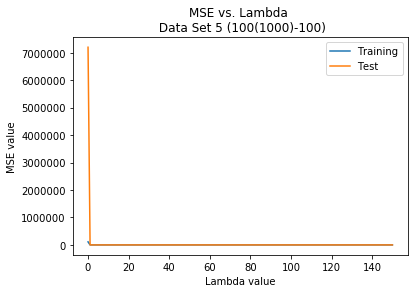

In [152]:
plt.figure()
plt.plot(train_df5_mse_list)
plt.plot(test_df5_mse_list)  
plt.ylabel('MSE value')
plt.xlabel('Lambda value')
plt.title('MSE vs. Lambda \n Data Set 5 (100(1000)-100)')
plt.legend(['Training', 'Test'])

plt.savefig("Q1_plot_5.pdf")

plt.show()

### Additional Plot 1b 

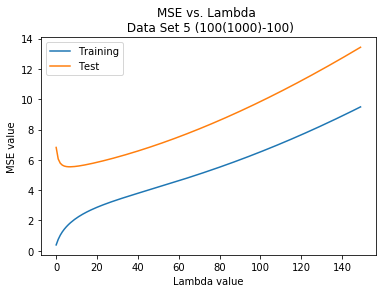

In [155]:
plt.figure()
plt.plot(train_df5_mse_list[1:])
plt.plot(test_df5_mse_list[1:])  
plt.ylabel('MSE value')
plt.xlabel('Lambda value')
plt.title('MSE vs. Lambda \n Data Set 5 (100(1000)-100)')
plt.legend(['Training', 'Test'])

#plt.savefig("Q1b_plot_3.pdf")

plt.show()

# 6th Data Set Test (100(1000)-100)

train 150(1000)-100; test 1000-100

### 6th Data Set Training 

In [49]:
train_df6_f, train_df6_t = feature_target(train_df6, 100) # separate df into features and columns

In [50]:
train_df6_mse_list = train_mse(train_df6_f, train_df6_t, 100) # generate training data mse scores for lambda range

In [51]:
print('Optimal lambda train_df6 = {},'.format(np.argmin(train_df6_mse_list)), 'MSE = {};'.format(np.min(train_df6_mse_list)), 
      
      'Worst lambda train_df6 = {},'.format(np.argmax(train_df6_mse_list)), 'MSE = {}'.format(np.max(train_df6_mse_list)))

Optimal lambda train_df6 = 1, MSE = 0.384724513923247; Worst lambda train_df6 = 0, MSE = 111329.04494344193


### 6th Data Set Test

In [52]:
test_df6 = pd.read_csv('test-1000-100.csv')

test_df6_f, test_df6_t = feature_target(test_df6, 100)

In [53]:
train_w_list = test_list(train_df6_f, train_df6_t, 100)

test_df6_mse_list = test_mses(train_w_list, test_df6_f, test_df6_t)

In [54]:
print('Optimal lambda test_df6 = {},'.format(np.argmin(test_df6_mse_list)), 'MSE = {};'.format(np.min(test_df6_mse_list)), 
      
      'Worst lambda test_df6 = {},'.format(np.argmax(test_df6_mse_list)), 'MSE = {}'.format(np.max(test_df6_mse_list)))

Optimal lambda test_df6 = 8, MSE = 5.540902229344963; Worst lambda test_df6 = 0, MSE = 7197443.424593119


### Visualize Data Set 6 

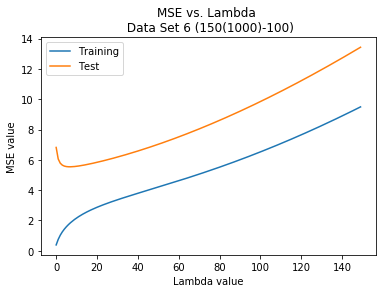

In [162]:
plt.figure()
plt.plot(train_df6_mse_list[1:])
plt.plot(test_df6_mse_list[1:])  
plt.ylabel('MSE value')
plt.xlabel('Lambda value')
plt.title('MSE vs. Lambda \n Data Set 6 (150(1000)-100)')
plt.legend(['Training', 'Test'])

#plt.savefig("Q1_plot_6.pdf")

plt.show()